# Predição do tipo de vinho usando Deep Learning
Projeto base: https://www.geeksforgeeks.org/prediction-of-wine-type-using-deep-learning/?ref=rp

# Importando as bibliotecas

In [1]:
%%capture
!pip install pycaret

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pycaret.classification import *


# Carregando os dados

In [3]:
# Lendo os dados do vinho branco
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep =';')

# Lendo os dados do vinho vermelho
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep =';')


# Visualização dos dados

In [4]:
red.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
white.tail()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [6]:
red.sample(5)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
455,11.3,0.620,0.67,5.2,0.086,6.0,19.0,0.99880,3.22,0.69,13.4,8
628,8.7,0.540,0.26,2.5,0.097,7.0,31.0,0.99760,3.27,0.60,9.3,6
865,7.2,0.635,0.07,2.6,0.077,16.0,86.0,0.99748,3.51,0.54,9.7,5
248,7.7,0.530,0.06,1.7,0.074,9.0,39.0,0.99615,3.35,0.48,9.8,6
503,10.5,0.260,0.47,1.9,0.078,6.0,24.0,0.99760,3.18,1.04,10.9,7


# Descrição dos dados

In [7]:
white.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [8]:
# Verifica se há valores nulos
pd.isnull(red)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


# Exibição dos dados em gráfico

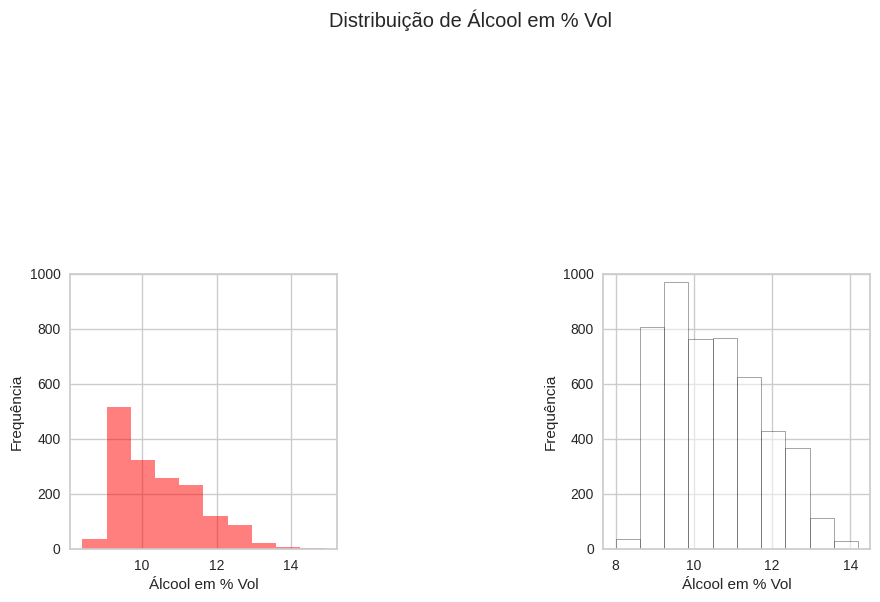

In [9]:
# Criando uma figura com dois subplots (1 linha, 2 colunas)
fig, ax = plt.subplots(1, 2)

# Configurando o histograma para o vinho tinto
ax[0].hist(red.alcohol, bins=10, facecolor='red', alpha=0.5, label="Vinho tinto")

# Configurando o histograma para o vinho branco
ax[1].hist(white.alcohol, bins=10, facecolor='white', ec='black', lw=0.5, alpha=0.5, label="Vinho branco")

# Ajustando os espaços entre os subplots
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=1)

# Configurando os limites dos eixos y, e os rótulos dos eixos x e y para o vinho tinto
ax[0].set_ylim([0, 1000])
ax[0].set_xlabel("Álcool em % Vol")
ax[0].set_ylabel("Frequência")

# Configurando os limites dos eixos y, e os rótulos dos eixos x e y para o vinho branco
ax[1].set_ylim([0, 1000])
ax[1].set_xlabel("Álcool em % Vol")
ax[1].set_ylabel("Frequência")

# Adicionando um título para a figura
fig.suptitle("Distribuição de Álcool em % Vol")

# Exibindo a figura
plt.show()


# Processamento de dados

In [10]:
# Adicionando a coluna 'type' ao dataframe 'red' com valor 1
red['type'] = 1

# Adicionando a coluna 'type' ao dataframe 'white' com valor 0
white['type'] = 0

# Concatenando os dataframes 'red' e 'white'
wines = pd.concat([red, white], ignore_index=True)

# Definindo as variáveis independentes (X) e a variável dependente (y)
X = wines.iloc[:, 0:11]
y = wines.type.values


# Utilizando o PyCaret para criar um modelo de Machine Learning para prever o tipo do vinho

In [11]:
# Configurando o Pycaret para receber nossos dados para modelagem
setup(data=X, target=y, fold=20)

,Description,Value
0,Session id,8567
1,Target,target
2,Target type,Binary
3,Original data shape,"(6497, 12)"
4,Transformed data shape,"(6497, 12)"
5,Transformed train set shape,"(4547, 12)"
6,Transformed test set shape,"(1950, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [12]:
# Comparar os modelos e informar os três melhores
top3 = compare_models(n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9956,0.9983,0.9875,0.9949,0.9910,0.9881,0.9882,0.3490
xgboost,Extreme Gradient Boosting,0.9947,0.9986,0.9830,0.9956,0.9892,0.9857,0.9858,0.1080
lda,Linear Discriminant Analysis,0.9941,0.9959,0.9857,0.9903,0.9879,0.9839,0.9841,0.0390
rf,Random Forest Classifier,0.9936,0.9982,0.9786,0.9956,0.9869,0.9827,0.9828,0.5440
lightgbm,Light Gradient Boosting Machine,0.9934,0.9974,0.9804,0.9930,0.9865,0.9821,0.9823,1.3215
gbc,Gradient Boosting Classifier,0.9927,0.9978,0.9804,0.9903,0.9851,0.9803,0.9805,0.7400
ada,Ada Boost Classifier,0.9916,0.9987,0.9804,0.9858,0.9829,0.9774,0.9775,0.2330
ridge,Ridge Classifier,0.9861,0.0000,0.9625,0.9814,0.9715,0.9623,0.9627,0.0535
qda,Quadratic Discriminant Analysis,0.9850,0.9932,0.9857,0.9556,0.9701,0.9601,0.9606,0.0600
lr,Logistic Regression,0.9842,0.9935,0.9562,0.9792,0.9673,0.9569,0.9572,0.9150


Processing:   0%|          | 0/67 [00:00<?, ?it/s]

# Analisar modelo

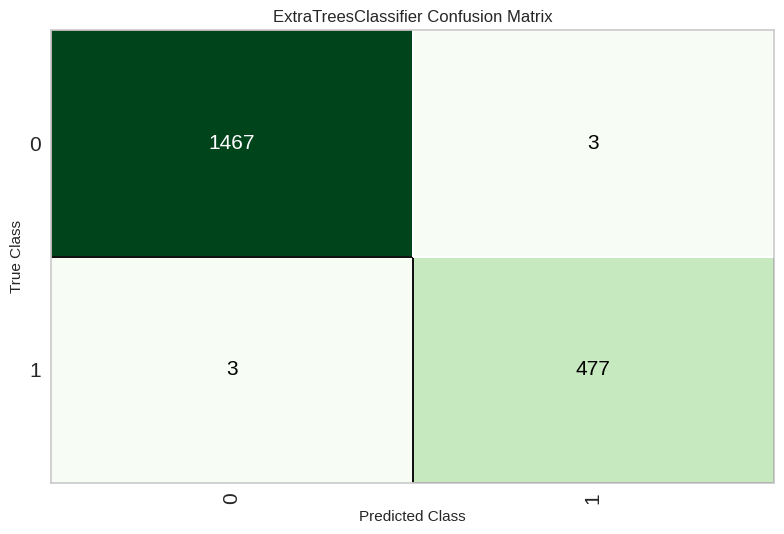

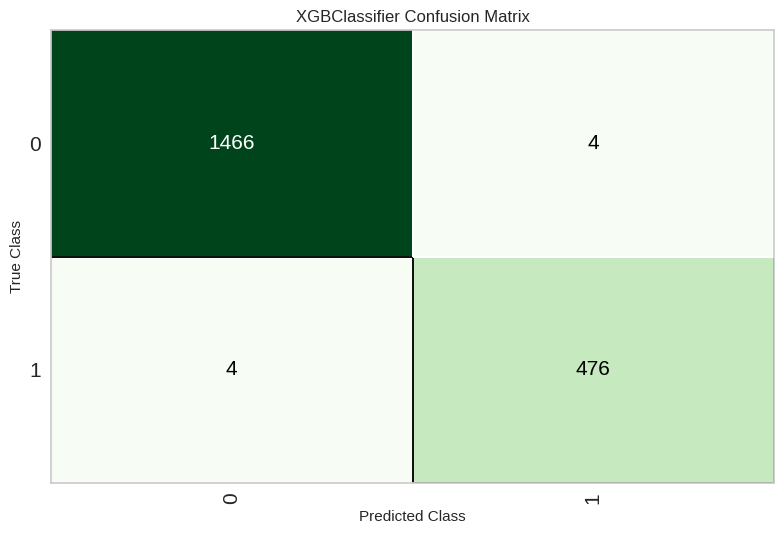

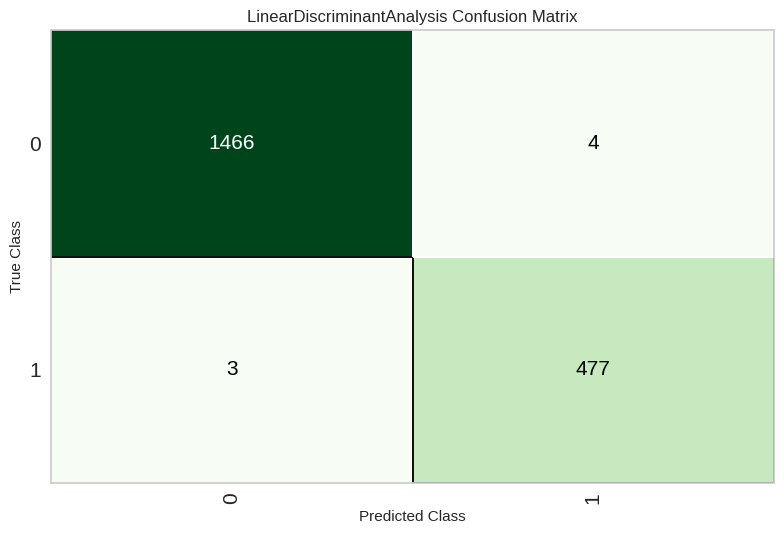

In [13]:
# Matriz de confusão
for i in range(len(top3)):
    plot_model(top3[i], plot = 'confusion_matrix')

    print()

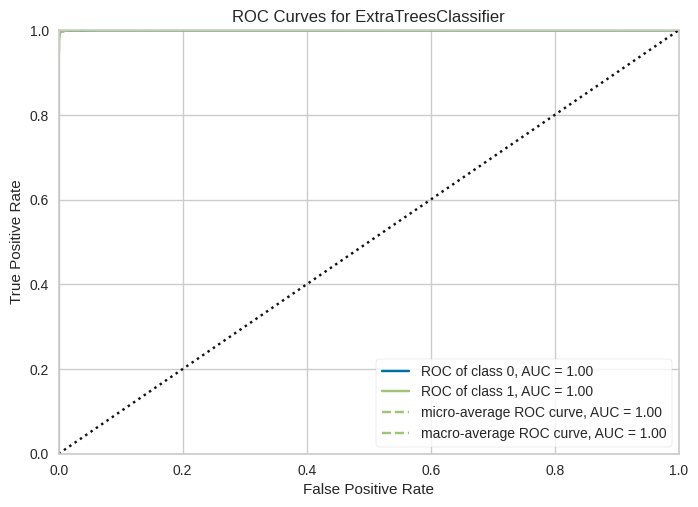

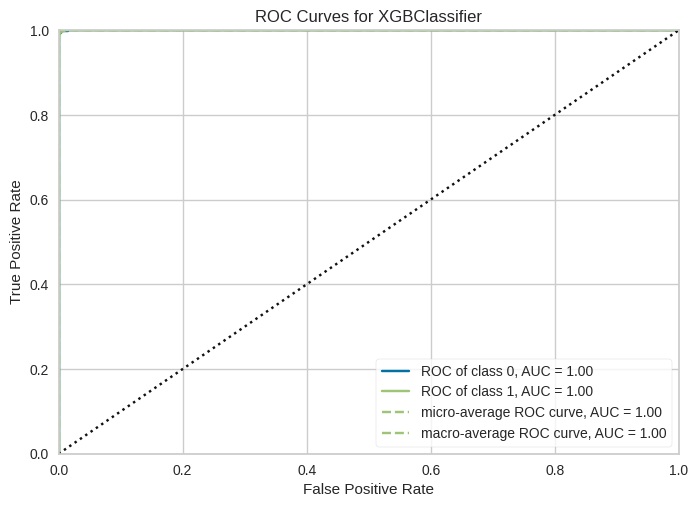

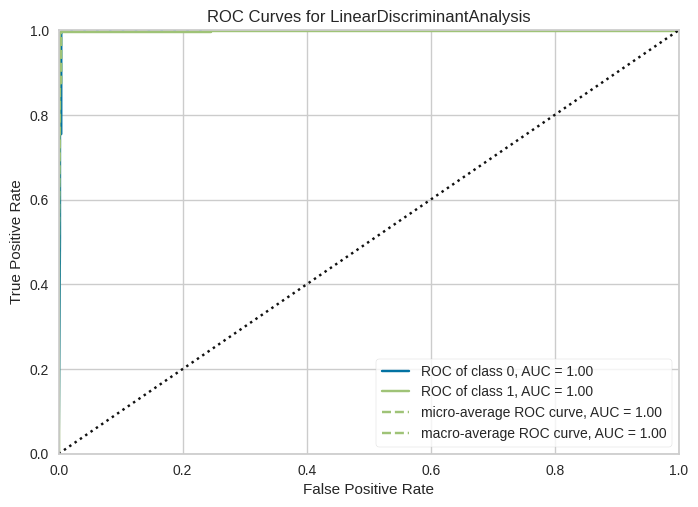

In [14]:
# Curva AUC
for i in range(len(top3)):
    plot_model(top3[i], plot = 'auc')

    print()

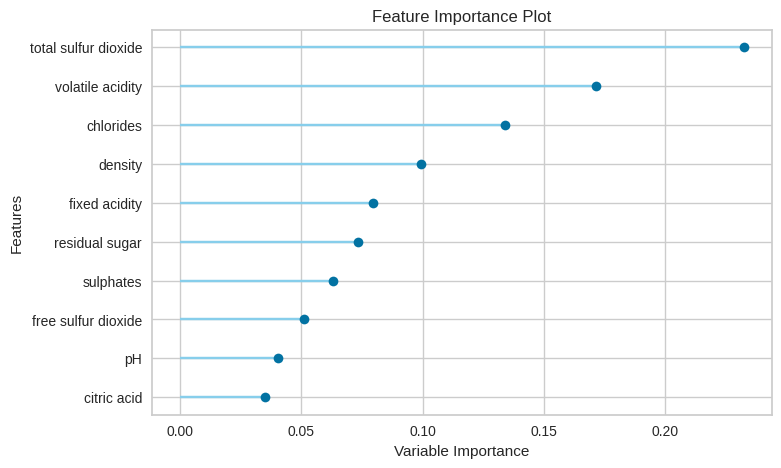

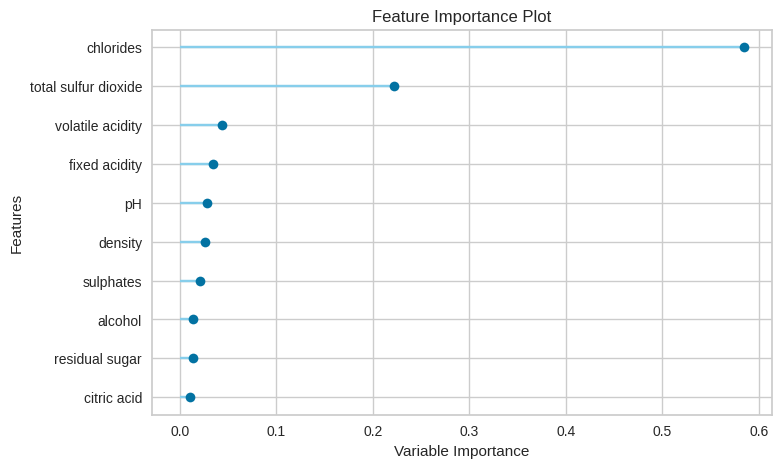

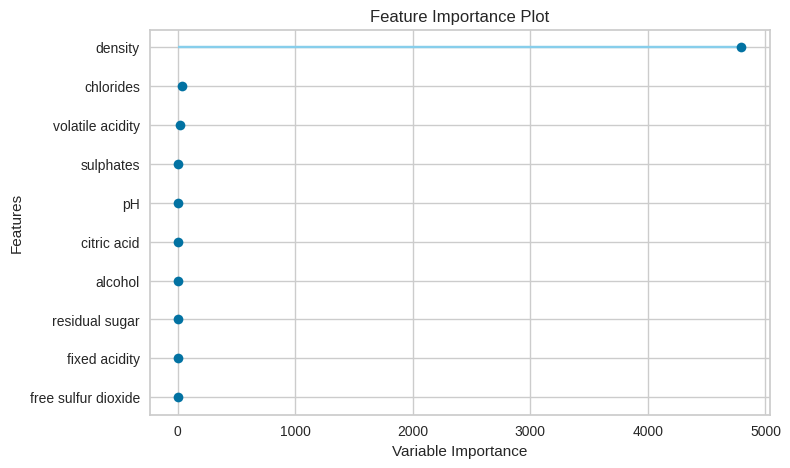

In [15]:
# Importância das features
for i in range(len(top3)):
    plot_model(top3[i], plot = 'feature')

    print()

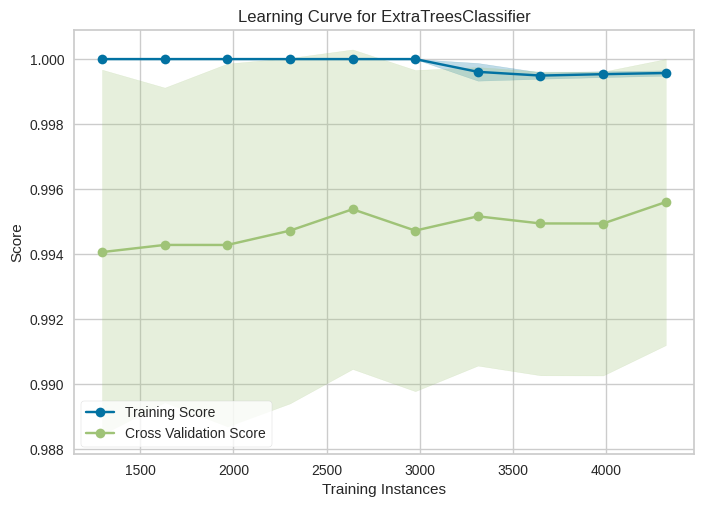

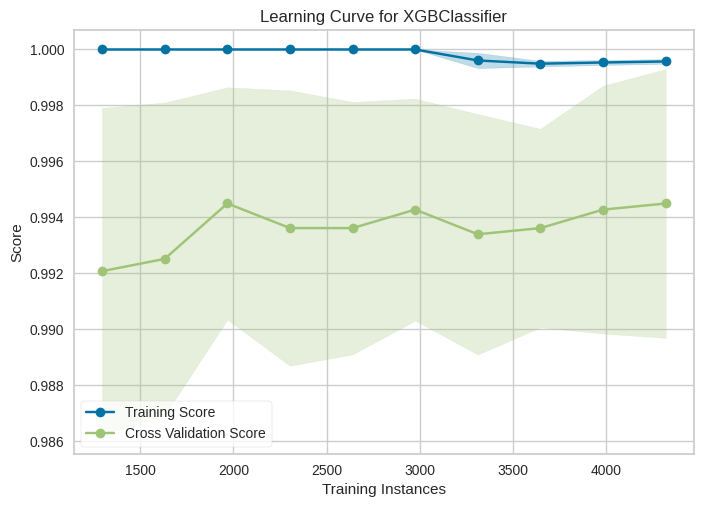

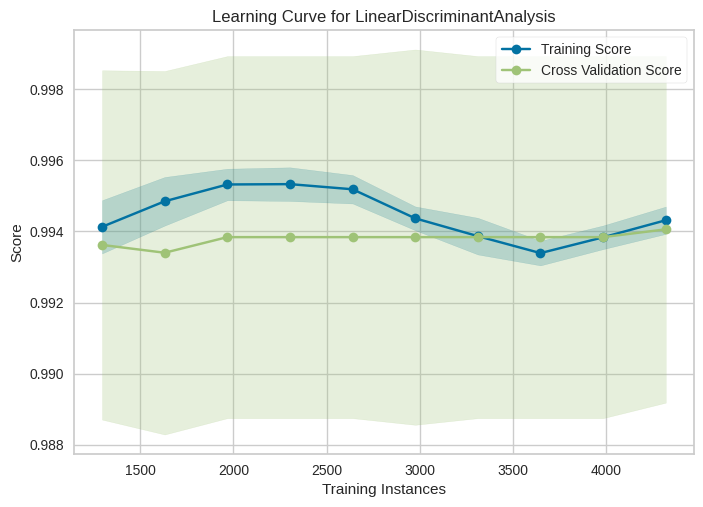

In [16]:
# Curva de aprendizado
for i in range(len(top3)):
    plot_model(top3[i], plot = 'learning')

    print()

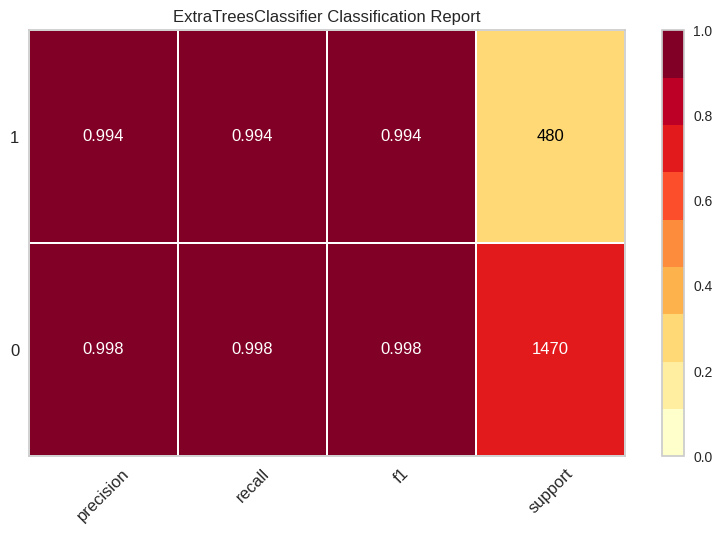

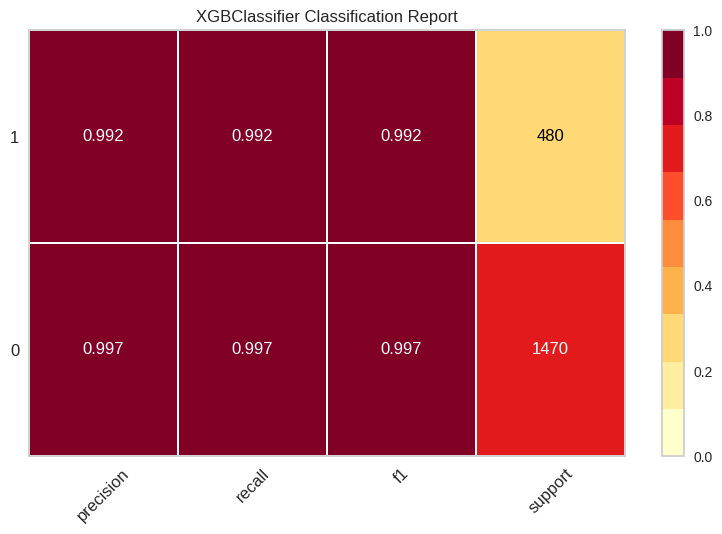

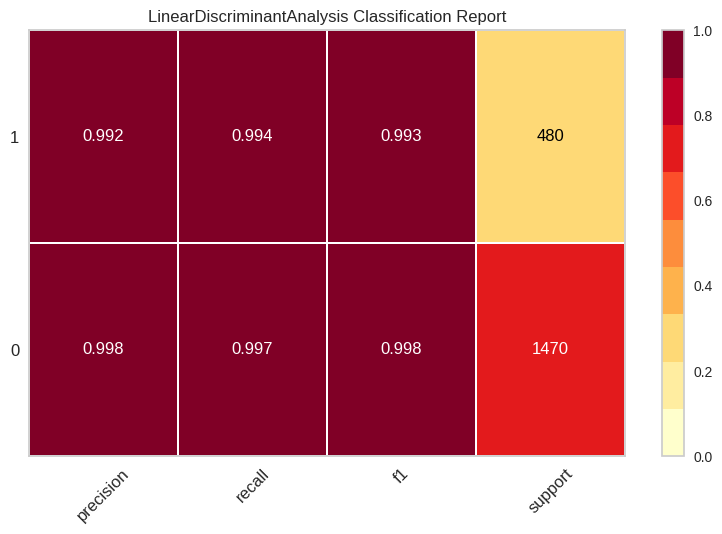

In [17]:
# Class report
for i in range(len(top3)):
    plot_model(top3[i], plot = 'class_report')

    print()

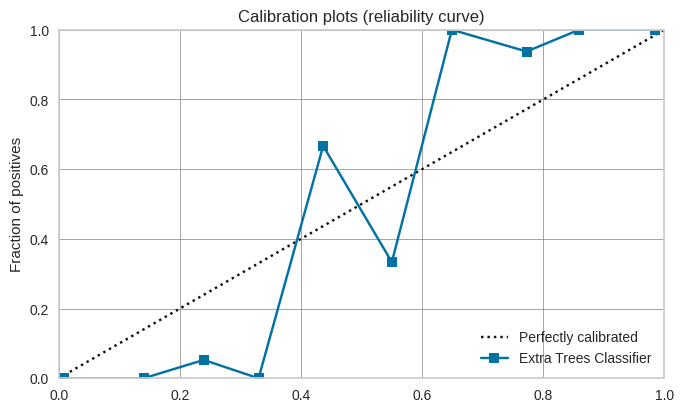

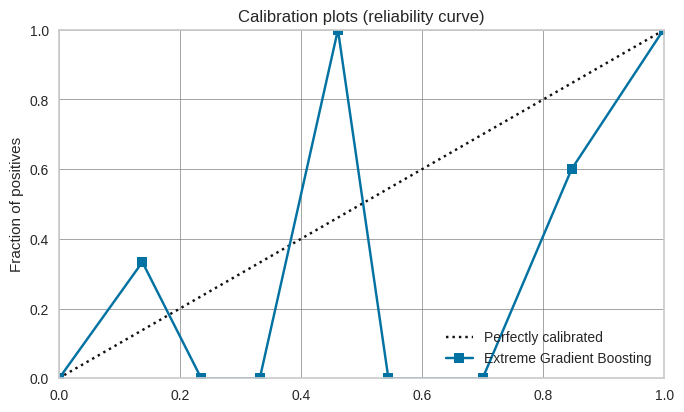

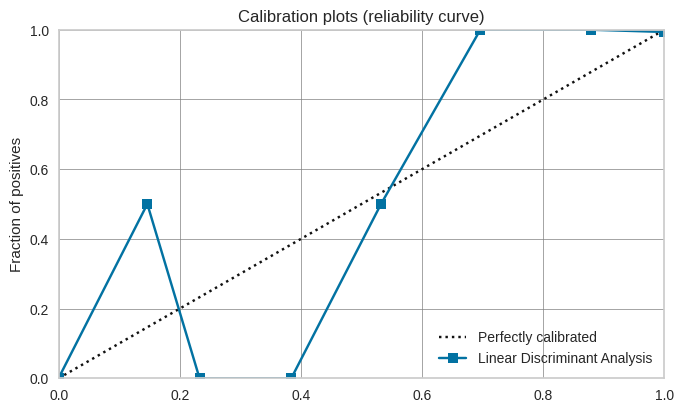

In [18]:
# Verifica a calibração
for i in range(len(top3)):
    plot_model(top3[i], plot = 'calibration')

    print()

# Testando os três melhores modelos

In [19]:
# Testando os modelos 20 vezes e vendo as médias das métricas de acurácia
et = create_model('et', fold=20)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9956,0.9984,0.9821,1.0000,0.9910,0.9881,0.9882
3,0.9912,0.9994,0.9643,1.0000,0.9818,0.9760,0.9763
4,0.9912,0.9952,1.0000,0.9655,0.9825,0.9766,0.9769
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9956,1.0000,1.0000,0.9825,0.9912,0.9882,0.9883
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9956,0.9995,0.9821,1.0000,0.9910,0.9881,0.9881


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [20]:
xgboost = create_model('xgboost', fold=20)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9956,0.9999,0.9821,1.0000,0.9910,0.9881,0.9882
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9956,0.9988,0.9821,1.0000,0.9910,0.9881,0.9882
3,0.9912,0.9996,0.9643,1.0000,0.9818,0.9760,0.9763
4,0.9912,0.9998,0.9821,0.9821,0.9821,0.9763,0.9763
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9868,1.0000,0.9464,1.0000,0.9725,0.9638,0.9644


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [21]:
lda = create_model('lda', fold=20)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9956,0.9996,1.0000,0.9825,0.9912,0.9882,0.9883
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9912,0.9925,0.9821,0.9821,0.9821,0.9763,0.9763
3,0.9868,0.9923,0.9464,1.0000,0.9725,0.9638,0.9645
4,0.9956,1.0000,1.0000,0.9825,0.9912,0.9882,0.9883
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9956,1.0000,1.0000,0.9825,0.9912,0.9882,0.9883
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9912,0.9998,0.9643,1.0000,0.9818,0.9760,0.9763


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Observa-se que, testando 20 vezes cada modelo, o modelo **Extra Trees Classifier** segue tendo as melhores performances diante dos demais modelos neste conjunto de dados.

# Tunning
Para aprimorar ainda mais a eficácia dos nossos modelos, o método `tune_model()` do PyCaret pode ser empregado. Este método nos permite verificar se conseguimos obter avanços significativos nas métricas de avaliação dos modelos.

In [22]:
tune_et = tune_model(et, n_iter=50, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9912,0.9975,0.9821,0.9821,0.9821,0.9763,0.9763
3,0.9868,0.9956,0.9464,1.0000,0.9725,0.9638,0.9645
4,0.9956,0.9999,1.0000,0.9825,0.9912,0.9882,0.9883
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9956,1.0000,1.0000,0.9825,0.9912,0.9882,0.9883
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9912,0.9990,0.9821,0.9821,0.9821,0.9763,0.9763


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 20 folds for each of 50 candidates, totalling 1000 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [23]:
tune_xgboost = tune_model(xgboost, n_iter=50, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9956,0.9976,0.9821,1.0000,0.9910,0.9881,0.9882
3,0.9912,0.9947,0.9643,1.0000,0.9818,0.9760,0.9763
4,0.9868,0.9998,1.0000,0.9492,0.9739,0.9651,0.9657
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9912,1.0000,1.0000,0.9655,0.9825,0.9766,0.9769
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9956,0.9997,1.0000,0.9825,0.9912,0.9882,0.9883


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 20 folds for each of 50 candidates, totalling 1000 fits


In [24]:
tune_lda = tune_model(lda, n_iter=50, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9956,0.9996,1.0000,0.9825,0.9912,0.9882,0.9883
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9912,0.9939,0.9821,0.9821,0.9821,0.9763,0.9763
3,0.9868,0.9891,0.9464,1.0000,0.9725,0.9638,0.9645
4,0.9956,1.0000,1.0000,0.9825,0.9912,0.9882,0.9883
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9956,1.0000,0.9818,1.0000,0.9908,0.9879,0.9880
8,0.9868,0.9997,0.9643,0.9818,0.9730,0.9642,0.9643


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 20 folds for each of 36 candidates, totalling 720 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Houve melhorias apenas no Extreme Gradient Boosting.

# Testando o modelo com dados de teste
Vamos conduzir um experimento com o modelo, empregando os dados de teste, a fim de analisar como as métricas de precisão se contrastam com os resultados obtidos previamente pelo modelo Extra Trees Classifier.

In [25]:
# Prever no conjunto de testes
predict_model(et)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9969,0.9999,0.9938,0.9938,0.9938,0.9917,0.9917


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target,prediction_label,prediction_score
3895,6.9,0.280,0.31,7.200000,0.040,47.0,168.0,0.99460,3.29,0.57,10.6,0,0,1.00
6066,6.3,0.250,0.27,6.600000,0.054,40.0,158.0,0.99378,3.20,0.48,10.3,0,0,1.00
223,8.6,0.645,0.25,2.000000,0.083,8.0,28.0,0.99815,3.28,0.60,10.0,1,1,1.00
1858,5.8,0.360,0.38,0.900000,0.037,3.0,75.0,0.99040,3.28,0.34,11.4,0,0,0.99
3092,8.0,0.340,0.49,9.000000,0.033,39.0,180.0,0.99360,3.13,0.38,12.3,0,0,0.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,6.9,0.240,0.36,20.799999,0.031,40.0,139.0,0.99750,3.20,0.33,11.0,0,0,0.99
4977,6.1,0.280,0.27,4.700000,0.030,56.0,140.0,0.99042,3.16,0.42,12.5,0,0,1.00
4850,6.7,0.240,0.37,11.300000,0.043,64.0,173.0,0.99632,3.08,0.53,9.9,0,0,1.00
3538,6.8,0.310,0.32,7.600000,0.052,35.0,143.0,0.99590,3.14,0.38,9.0,0,0,1.00


O modelo teve a maioria das métricas com desempenho superior!
# Finalizando o modelo

In [27]:
# Finalizando o modelo
final_et_model = finalize_model(et)

# Salvar modelo
Finalmente, você pode salvar todo o pipeline em disco para uso posterior, usando a função `save_model` do pycaret.

In [28]:
# Salvar pipeline
save_model(final_et_model, 'prever_tipo_vinho')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'sulphates', 'alcohol'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_feature...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                            

# Carregar pesos do modelo

In [29]:
pesos = load_model('prever_tipo_vinho')

Transformation Pipeline and Model Successfully Loaded


# Fazendo previsão com os pesos carregados

In [30]:
# Nova amostra
dados_prever = [6.2, 0.36, 0.45, 10.40, 0.06, 22.0, 184.0, 0.99711, 3.31, 0.56, 9.8]

# Convertendo a lista para um DataFrame
amostra = pd.DataFrame([dados_prever],
                       columns=['fixed acidity', 'volatile acidity',
                                'citric acid', 'residual sugar', 'chlorides',
                                'free sulfur dioxide', 'total sulfur dioxide',
                                'density', 'pH', 'sulphates', 'alcohol'
                                ]
                       )

previsao = predict_model(pesos, data = amostra)

# Cria uma nova coluna 'tipo' baseada na coluna 'prediction_label'
previsao['tipo'] = previsao['prediction_label'].apply(lambda x: 'VINHO BRANCO' if x == 0 else 'VINHO TINTO')
previsao


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,prediction_label,prediction_score,tipo
0,6.2,0.36,0.45,10.4,0.06,22.0,184.0,0.99711,3.31,0.56,9.8,0,1.0,VINHO BRANCO


# Conclusão

A biblioteca PyCaret, com sua simplicidade e eficiência, permite a experimentação de vários modelos de aprendizado de máquina com apenas algumas linhas de código, facilitando a identificação do modelo que melhor se ajusta ao conjunto de dados em análise.
Neste estudo específico, conseguimos desenvolver um modelo que não só se harmonizou perfeitamente com nossos dados, mas também demonstrou uma capacidade notável de prever corretamente o tipo de vinho. Isso ilustra o poder e a versatilidade do aprendizado de máquina quando aplicado de maneira eficaz.